In [600]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

## Exercise 1

The maximization problem is
$$ \max_{C_1 \in [0, W_1]} u(C_1) $$
Since the utility function is increasing by assumption, the optimal choice is
$$ C_1^* = W_1 $$
That is to eat all the cake. 

The problem can be equivalently rewritten as
$$ \max_{W_2 \in [0, W_1]} u(W_1 - W_2) $$
Similarly, since the utility function is increasing, the optimal choice is
$$ W_2^* = 0 $$

## Exercise 2

For $ t=2 $: 
$$ \max_{W_3 \in [0, W_2]} u(W_2 - W_3) $$
We have known that there will not be any cake left for $ t=3 $, and thus: 
$$ W_3^* = 0 $$

For $ t=1 $, we substitute the optimal choice for $ t=2 $ into the objective function: 
$$ \max_{W_2 \in [0, W_1]} u(W_1 - W_2) + \beta u(W2 - 0) $$
To ensure an interior solution, we assume that $ u'(C) = \infty $, otherwise there can be a cornor solution (write out the KKT conditions with complementary slackness to see this). The optimal choice is characterized by the FOC: 
$$ u'(W_1 - W_2) = \beta u'(W_2) $$

## Exercise 3

With a utility function of the logarithm form, the solutions will be interior, since the $ \frac{dln(x)}{dx} = \frac{1}{x} $ is positive infinity at the corner $ x=0 $. The FOCs will hold with equality. 

For $ t=3 $: 
$$ \max_{W_4 \in [0, W_3]} \ln(W_3 - W_4) $$
We have known that there will be no leftover, the optimal chocie is: 
$$ W_4^* = 0 $$

For $ t=2 $: 
$$ \max_{W_3 \in [0, W_2]} \ln(W_2 - W_3) + \beta \ln(W_3 - 0) $$
The optimal choice is characterized by the FOC: 
$$ \frac{1}{W_2 - W_3} = \beta \frac{1}{W_3} $$
Rrearrange to get: 
$$ W_3^*(W_2) = \frac{\beta}{1+\beta}W_2 $$

For $ t=1 $: 
$$ \max_{W_2 \in [0, W_1]} \ln(W_1 - W_2) + \beta \ln(W_2 - W_3^*) + \beta^2 \ln(W_3^* - W_4^*) $$
The optimal choice is characterized by the FOC: 
$$ \frac{1}{W_1 - W_2} = \beta \frac{1 - W_3^{*'}(W_2)}{W_2 - W_3^*(W_2)} + \beta^2 \frac{W_3^{*'}(W_2)}{W_3^*} $$
Rearrange to get: 
$$ W_2^*(W_1) = \frac{\beta(1+\beta)}{1+\beta(1+\beta)} W_1 $$

Substitute $ \beta=0.9 $ and $ W_1=1 $ into the solutions to get: 
$$ \begin{aligned}
W_2^* &= 0.631 \\
W_3^* &= 0.299 \\
W_4^* &= 0
\end{aligned} $$

Equivalently, the consumptions for each period are: 
$$ \begin{aligned}
C_1^* &= 0.369 \\
C_2^* &= 0.332 \\
C_3^* &= 0.299
\end{aligned} $$

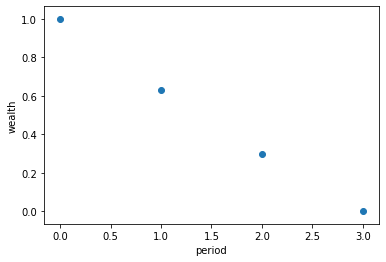

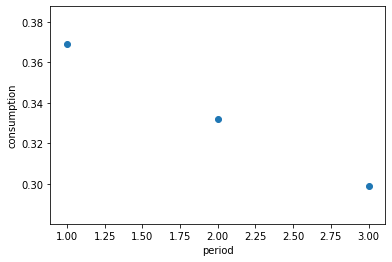

In [2]:
# See how the wealth and consumptions for each period evolve. 
beta = 0.9
w_vec = [1]
w_vec.append((beta*(1+beta)/(1+beta*(1+beta))) * w_vec[0])
w_vec.append((beta/(1+beta)) * w_vec[1])
w_vec.append(0)

c_vec = [None]
for t in range(len(w_vec) - 1): 
    c_vec.append(w_vec[t] - w_vec[t+1])
    
plt.scatter(list(range(len(w_vec))), w_vec)
plt.xlabel('period')
plt.ylabel('wealth')
plt.show()

plt.scatter(list(range(len(w_vec))), c_vec)
plt.xlabel('period')
plt.ylabel('consumption')
plt.show()

## Exercise 4

The maximization problem for $ t = T-1 $ is: 
$$ \max_{W_T} u(W_{T-1} - W_T) + \beta V_T(W_T) $$
, where $ V_T(W_T) = \max_{W_{T+1}} u(W_T - W_{T+1}) $ is the value function of period $ t=T $. The optimal choice for period $ t=T-1 $ is characterized by the FOC.  
$$ u'(W_{T-1} - W_T) = \beta V_T'(W_T) $$
, which, based on the Envelope Theorem, is:
$$ u'(W_{T-1} - W_T) = \beta u'(W_T - \psi_{T}(W_T)) $$
, where $ \psi_{T}(W_T) = 0 $. This implicitly gives the policy function: 
$$ W_T^* = \psi_{T-1} (W_{T-1}) $$

Thus, the value function of period $ t=T-1 $ is given by: 
$$ V_{T-1}(W_{T-1}) = u(W_{T-1} - \psi_{T-1}(W_{T-1})) + \beta V_T(\psi_{T-1} (W_{T-1})) $$

## Exercise 5

We rewrite the FOC of $ t = T-1 $ with the assumed functional form of the utility function: 
$$ \frac{1}{\bar{W} - W_{T}} = \beta \frac{1}{W_T} $$
Solve for $ W_T^* $: 
$$ W_T^* = \psi_{T-1}(\bar{W}) = \frac{\beta}{1+\beta} \bar{W} $$

But we know that $ \psi_T(\bar{W}) = 0 $ since there will be no cake left after the last period with an increasing utility function. Therefore, we conclude that: 
$$ \psi_{T-1}(\bar{W}) \ne \psi_T(\bar{W}) $$





Substitute the policy function into the value function to get: 
$$ \begin{aligned} 
    V_{T-1}(\bar{W}) 
    &= \ln{(\bar{W} - \frac{\beta}{1+\beta} \bar{W})} + \beta \ln{(\frac{\beta}{1+\beta} \bar{W})} \\
    &= \ln{(\frac{1}{1+\beta} \bar{W})} + \beta \ln{(\frac{\beta}{1+\beta} \bar{W})} 
\end{aligned}$$
And we know that
$$ V_T(\bar{W}) = \ln{(\bar{W})} $$
Therefore, we conclude that: 
$$ V_{T-1}(\bar{W}) \ne V_T(\bar{W}) $$

## Exercise 6

For $ t = T-2 $: 
$$ \max_{W_{T-1}} \ln{(W_{T-2} - W_{T-1})} + \beta V_{T-1}(W_{T-1}) $$

The optimal solution is characterized by the FOC, based on the Envelope Theorem: 
$$ \begin{aligned}
\frac{1}{W_{T-2} - W_{T-1}} &= \beta V'_{T-1}(W_{T-1}) \\
\Leftrightarrow 
\frac{1}{W_{T-2} - W_{T-1}} &= \beta \frac{1}{W_{T-1} - \psi_{T-1}(W_{T-1})}
\end{aligned} $$

Substitute $ \psi_{T-1}(W_{T-1}) = \frac{\beta}{1+\beta} W_{T-1} $ into the FOC to get: 
$$ \frac{1}{W_{T-2} - W_{T-1}} = \beta \frac{1}{W_{T-1} - \frac{\beta}{1+\beta} W_{T-1}} $$

Solve for $ W^*_{T-1}$: 
$$ W^*_{T-1} = \psi_{T-2}(W_{T-2}) = \frac{\beta + \beta^2}{1 + \beta + \beta^2} W_{T-2} $$

The value function for $ t = T-2 $ is given by: 
$$ \begin{aligned}
    V_{T-2}(W_{T-2}) 
    &= \ln{(W_{T-2} - \psi_{T-2}(W_{T_2})} + \beta V_{T-1}(\psi_{T-2}(W_{T-2})) \\
    &= \ln{(W_{T-2} - \frac{\beta + \beta^2}{1 + \beta + \beta^2} W_{T-2})} + \beta \ln{(\frac{\beta + \beta^2}{1 + \beta + \beta^2} W_{T-2} - \frac{\beta}{1+\beta} \frac{\beta + \beta^2}{1 + \beta + \beta^2} W_{T-2})} + \beta^2 \ln{(\frac{\beta}{1+\beta} \frac{\beta + \beta^2}{1 + \beta + \beta^2} W_{T-2})} \\
    &= \ln{(\frac{1}{1+\beta+\beta^2}W_{T-2}) + \beta \ln{(\frac{\beta}{1+\beta+\beta^2}W_{T-2}) + \beta^2 \ln{(\frac{\beta^2}{1+\beta+\beta^2}W_{T-2})}}}
\end{aligned} $$

## Exercise 7

By induction, we write: 
$$ \psi_{T-s}(W_{T-s}) = \frac{\sum_{i=1}^{s}}{\sum_{i=0}^{s}} W_{T-s} $$
$$ V_{T-s}(W_{T-s}) = \sum_{i=0}^{s} \beta^{i} \ln{(\frac{\beta^i}{\sum_{j=0}^{s}\beta^j} W_{T-s})} $$

As the horizon becomes infinite: 
$$ \lim_{s\rightarrow \infty} \psi_{T-s}(W_{T-s}) = \lim_{s\rightarrow \infty} \frac{\sum_{i=1}^{s}}{\sum_{i=0}^{s}} W_{T-s} = \frac{\frac{\beta}{1-\beta}}{\frac{1}{1-\beta}}W_{T-s} =  \beta W_{T-s} $$
$$ \lim_{s\rightarrow \infty} V_{T-s}(W_{T-s}) =\lim_{s\rightarrow \infty} \sum_{i=0}^{s} \beta^{i} \ln{(\frac{\beta^i}{\sum_{j=0}^{s}\beta^j} W_{T-s})} = \left(\frac{1}{1-\beta}\right) \ln \left((1-\beta) W_{T-s}\right)+\frac{\beta}{(1-\beta)^{2}} \ln (\beta)$$

## Exercise 8

The Bellman Equation when the horizon is infinite is, $ \forall t $:
$$ V_t(W_t) = \max_{W_{t+1}\in[0, W_t]} u(W_t - W_{t+1}) + \beta V_{t+1}(W_{t+1}) $$

## Exercise 9

In [424]:
W_min, W_max, N = 0.01, 1, 100
W_space = np.linspace(W_min, W_max, N)

## Exercise 10

In [425]:
# Define the utility function that accepts a matrix. 
# Set the utility of any nonpositive consumption to a very big negative number. 
def u(c): 
    c_process = c.copy() # Copy a new c matrix to avoid the original c_mat to be muted. 
    c_if_pos = c > 0
    c_process[~c_if_pos] = 1e-10 # Replace any negative consumption with a very small positive number close to zero. 
    util = np.log(c_process) # Take the natural log. u(C) = log(C)
    return util

# Specify the parameters
beta = 0.9

In [426]:
# Generate the matrix of possible initial wealth and consumptions
W_vec = W_space.reshape((N, 1))
W_prime_vec = W_space.reshape((1, N))
W_mat = np.tile(W_vec, (1, N))
W_prime_mat = np.tile(W_prime_vec, (N, 1))
c_mat = W_mat - W_prime_mat
c_mat

array([[ 0.  , -0.01, -0.02, ..., -0.97, -0.98, -0.99],
       [ 0.01,  0.  , -0.01, ..., -0.96, -0.97, -0.98],
       [ 0.02,  0.01,  0.  , ..., -0.95, -0.96, -0.97],
       ...,
       [ 0.97,  0.96,  0.95, ...,  0.  , -0.01, -0.02],
       [ 0.98,  0.97,  0.96, ...,  0.01,  0.  , -0.01],
       [ 0.99,  0.98,  0.97, ...,  0.02,  0.01,  0.  ]])

In [427]:
# After the last period, there should not be any wealth left, since the utility function is increasing. 
V_T_post = np.zeros(N).reshape(N, 1)
V_T_post_mat = np.tile(V_T_post.reshape((1,N)),(N,1))
c_leq0 = c_mat <= 0
V_T_post_mat[c_leq0] = -1e10 # Replace the value function of any negative consumption with a big negative number. 
obj_func = lambda x: (u(c_mat) + beta * x) # arg x: value function of next period 
V_T = obj_func(V_T_post_mat).max(axis=1).reshape(N, 1)
psi_T = W_vec[np.argmax(obj_func(V_T_post_mat), axis=1)]

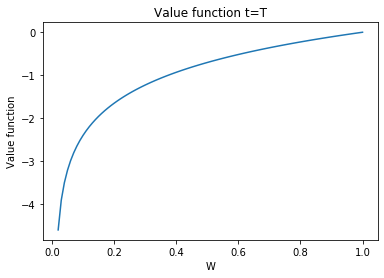

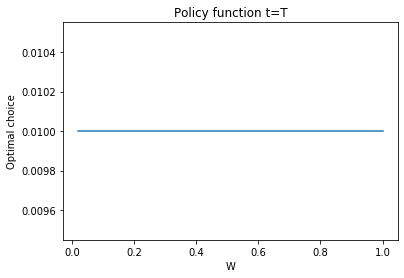

In [428]:
plt.plot(W_vec[1:], V_T[1:])
plt.title('Value function t=T')
plt.xlabel('W')
plt.ylabel('Value function')
plt.show()

plt.plot(W_vec[1:], psi_T[1:])
plt.title('Policy function t=T')
plt.xlabel('W')
plt.ylabel('Optimal choice')
plt.show()

## Exercise 11

In [429]:
# Calculate the distance between to value functions. 
sigma_T = lambda x, y: np.sum((x - y) ** 2)
sigma_T(V_T, V_T_post)

8.100000041446531e+19

## Exercise 12

In [430]:
# Iter for t = T-1
V_T_post = V_T.copy()
V_T_post_mat = np.tile(V_T_post.reshape((1,N)),(N,1))
V_T_post_mat[c_mat<=0] = -1e+10
V_T = obj_func(V_T_post_mat).max(axis=1).reshape(N, 1)
psi_T = W_vec[np.argmax(obj_func(V_T_post_mat), axis=1)]

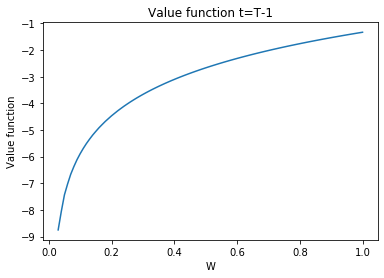

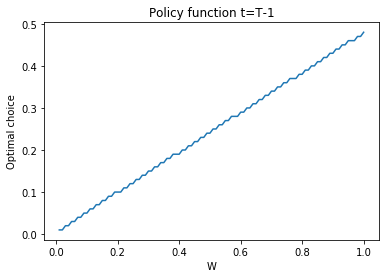

In [431]:
plt.plot(W_vec[2:], V_T[2:])
plt.title('Value function t=T-1')
plt.xlabel('W')
plt.ylabel('Value function')
plt.show()

plt.plot(W_vec, psi_T)
plt.title('Policy function t=T-1')
plt.xlabel('W')
plt.ylabel('Optimal choice')
plt.show()

In [432]:
sigma_T(V_T, V_T_post)

6.56100003357169e+19

## Exercise 13

In [433]:
# Iter for t = T-2
V_T_post = V_T.copy()
V_T_post_mat = np.tile(V_T_post.reshape((1,N)),(N,1))
V_T_post_mat[c_mat<=0] = -1e+10
V_T = obj_func(V_T_post_mat).max(axis=1).reshape(N, 1)
psi_T = W_vec[np.argmax(obj_func(V_T_post_mat), axis=1)]

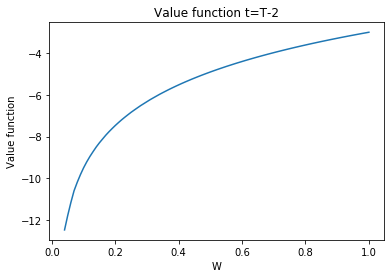

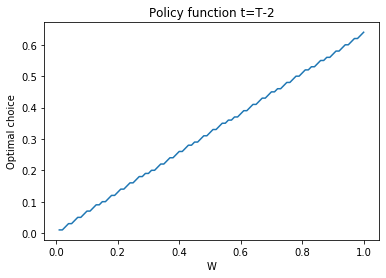

In [434]:
plt.plot(W_vec[3:], V_T[3:])
plt.title('Value function t=T-2')
plt.xlabel('W')
plt.ylabel('Value function')
plt.show()

plt.plot(W_vec, psi_T)
plt.title('Policy function t=T-2')
plt.xlabel('W')
plt.ylabel('Optimal choice')
plt.show()

In [435]:
sigma_T(V_T, V_T_post)

5.314410027193069e+19

## Exercise 14

In [436]:
distance = 1
iteration = 0
V_T = np.zeros(N).reshape(N, 1) # Initial value of V_T, i.e. V_T+1 = 0
obj_func = lambda x: (u(c_mat) + beta * x) # arg x: value function of next period 
psi_list = []

while distance >= 1e-9: 
    iteration += 1
    V_T_post = V_T
    V_T_post_mat = np.tile(V_T_post.reshape((1,N)),(N,1))
    c_leq0 = c_mat <= 0
    V_T_post_mat[c_leq0] = -1e10
    V_T = obj_func(V_T_post_mat).max(axis=1).reshape(N, 1)
    distance = sigma_T(V_T, V_T_post)
    psi_T = W_vec[np.argmax(obj_func(V_T_post_mat), axis=1)]
    psi_list.append(psi_T)

# Times of iterations until the distance measure is as small as 1e-9

print(f'The distance measure falls below the tolerance on the {iteration}-th iteration. ')

The distance measure falls below the tolerance on the 101-th iteration. 


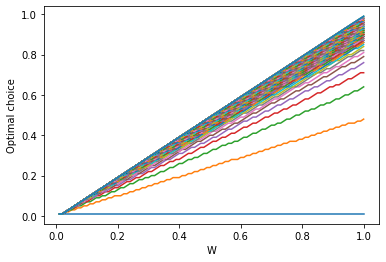

In [437]:
# The policy function converges to the same function. 
for iteration, psi in enumerate(psi_list): 
    plt.plot(W_vec, psi)
    plt.xlabel('W')
    plt.ylabel('Optimal choice')
plt.show()

## Exercise 15

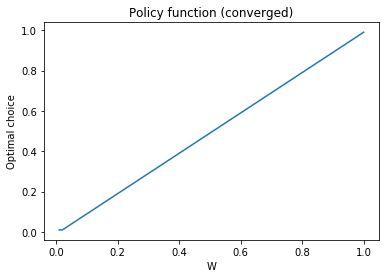

In [438]:
plt.plot(W_vec, psi_T)
plt.title('Policy function (converged)')
plt.xlabel('W')
plt.ylabel('Optimal choice')
plt.show()

## Exercise 16

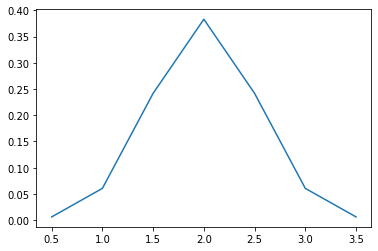

In [515]:
def normal_approximate(mu, sigma, N, k): 
    z_vector = np.linspace(mu - k * sigma, mu + k * sigma, N)
    w_vector = []
    F = norm.cdf
    for i in range(N): 
        if i == 0: 
            w_vector.append(F((z_vector[i] + z_vector[i+1]) / 2, mu, sigma))
        elif i == N - 1: 
            w_vector.append(1 - F((z_vector[i-1] + z_vector[i]) / 2, mu, sigma))
        else: 
            z_min = (z_vector[i-1] + z_vector[i]) / 2
            z_max = (z_vector[i] + z_vector[i+1]) / 2
            w_vector.append(F(z_max, mu, sigma) - F(z_min, mu, sigma))
    return z_vector, np.array(w_vector)

sigma = 0.5
mu = 4 * sigma
M = 7
k = 3
normal_pdf = normal_approximate(mu, sigma, M, k)
epsilon_density = normal_pdf[1]
epsilon_space = normal_pdf[0]
plt.plot(*normal_pdf)

## Exercise 17

In [676]:
# Define the utility function that accepts a scalar. 
# Set the utility of any nonpositive consumption to a very big negative number. 
def u(c): 
    if c <= 0: 
        c_process = 1e-10 # Replace any negative consumption with a very small positive number close to zero.
    else: 
        c_process = c 
    util = np.log(c_process) # Take the natural log. u(C) = log(C)
    return util


In [677]:
# The parameters have been set in Exercise 9 as follow: 
# W_min, W_max, N = 0.01, 1, 100
# W_space = np.linspace(W_min, W_max, N)

def util(W_space, epsilon_vec): 
    '''
    Return a three-dimentional cube, util[i][j][k] = epsilon[j] * u(W[i] - W'[k])
    '''
    dimension_1 = []
    for W_ele in W_space: 
        dimension_2 = []
        for epsilon_ele in epsilon_vec: 
            dimension_3 = []
            for W_prime_ele in W_space: 
                dimension_3.append(epsilon_ele * u(W_ele - W_prime_ele))
            dimension_2.append(dimension_3)
        dimension_1.append(dimension_2)
    return np.array(dimension_1)

def consumption(W_space, epsilon_vec): 
    '''
    Return a three-dimentional cube, util[i][j][k] = 1 * u(W[i] - W'[k]). Use this later for replacing the value function. 
    '''
    dimension_1 = []
    for W_ele in W_space: 
        dimension_2 = []
        for epsilon_ele in epsilon_vec: 
            dimension_3 = []
            for W_prime_ele in W_space: 
                dimension_3.append(epsilon_ele * (W_ele - W_prime_ele))
            dimension_2.append(dimension_3)
        dimension_1.append(dimension_2)
    return np.array(dimension_1)

util_mat = util(W_space, epsilon_space)
consumption_mat = consumption(W_space, epsilon_space)

In [678]:
V_T_post = np.zeros((N, M))
EV_T_post = V_T_post @ epsilon_density
EV_T_post_mat = np.tile(EV_T_post, (N, M, 1))

# Replace the value function of any negative consumption with a big negative number. 
EV_T_post_mat[consumption_mat <= 0] = -1e10

# Find the optimal choice
obj_func = lambda x: (util_mat + beta * x) # arg x: the expected value function of next period 
V_T = obj_func(EV_T_post_mat).max(axis=2)
index_mat = np.argmax(obj_func(EV_T_post_mat), axis=2)
psi_T = np.zeros((N, M))
for i in range(N): 
    for j in range(M):
        psi_T[i][j] = W_space[index_mat[i][j]]

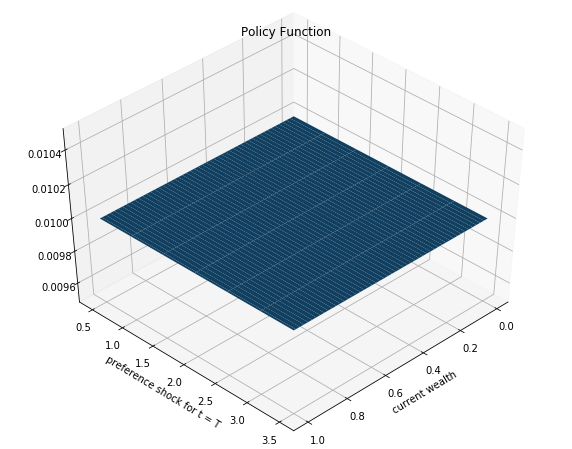

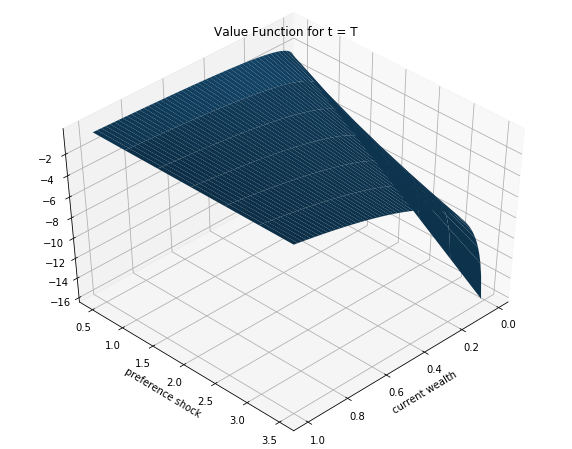

In [679]:
%matplotlib inline
# %matplotlib qt
X, Y = np.meshgrid(W_space, epsilon_space)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, psi_T)
new_ax.set_xlabel('current wealth')
new_ax.set_ylabel('preference shock for t = T')
new_ax.set_title("Policy Function") 
new_ax.view_init(elev=45,azim=45)
plt.show()

X, Y = np.meshgrid(W_space[1:], epsilon_space)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, V_T[1:])
new_ax.set_xlabel('current wealth')
new_ax.set_ylabel('preference shock')
new_ax.set_title("Value Function for t = T") 
new_ax.view_init(elev=45,azim=45)
plt.show()

## Exercise 18

In [680]:
distance1 = sigma_T(V_T, V_T_post)
distance1

5.6700000580251445e+20

## Exercise 19

In [681]:
# Iterate for t = T-1
V_T_post = V_T.copy()
EV_T_post = V_T_post @ epsilon_density
EV_T_post_mat = np.tile(EV_T_post, (N, M, 1))

# Replace the value function of any negative consumption with a big negative number. 
EV_T_post_mat[consumption_mat <= 0] = -1e10

# Find the optimal choice
obj_func = lambda x: (util_mat + beta * x) # arg x: the expected value function of next period 
V_T = obj_func(EV_T_post_mat).max(axis=2)
index_mat = np.argmax(obj_func(EV_T_post_mat), axis=2)
psi_T = np.zeros((N, M))
for i in range(N): 
    for j in range(M):
        psi_T[i][j] = W_space[index_mat[i][j]]

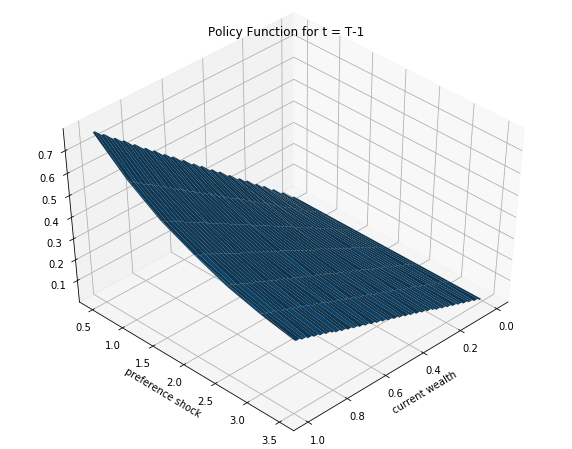

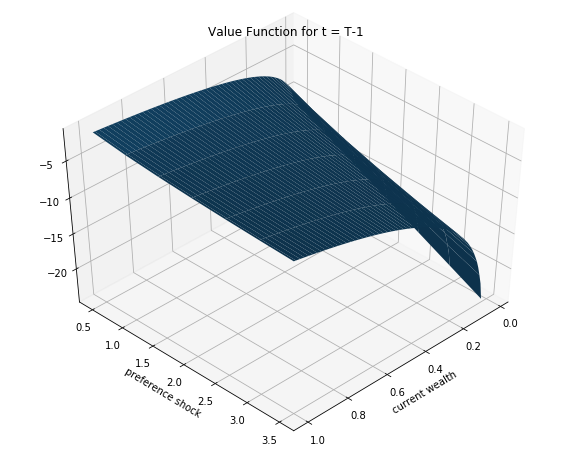

In [682]:
%matplotlib inline
# %matplotlib qt
X, Y = np.meshgrid(W_space, epsilon_space)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, psi_T)
new_ax.set_xlabel('current wealth')
new_ax.set_ylabel('preference shock')
new_ax.set_title("Policy Function for t = T-1") 
new_ax.view_init(elev=45,azim=45)
plt.show()

X, Y = np.meshgrid(W_space[2:], epsilon_space)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, V_T[2:])
new_ax.set_xlabel('current wealth')
new_ax.set_ylabel('preference shock')
new_ax.set_title("Value Function for t = T-1") 
new_ax.view_init(elev=45,azim=45)
plt.show()

In [684]:
distance2 = sigma_T(V_T, V_T_post)
print('sigma_T-1: ', distance2)
print('sigma_T  : ', distance1)
print('sigma_T-1 < sigma_T:', distance2 < distance1)

sigma_T-1:  4.592700047000368e+20
sigma_T  :  5.6700000580251445e+20
sigma_T-1 < sigma_T: True


## Exercise 20

In [685]:
# Iterate for t = T-2
V_T_post = V_T.copy()
EV_T_post = V_T_post @ epsilon_density
EV_T_post_mat = np.tile(EV_T_post, (N, M, 1))

# Replace the value function of any negative consumption with a big negative number. 
EV_T_post_mat[consumption_mat <= 0] = -1e10

# Find the optimal choice
obj_func = lambda x: (util_mat + beta * x) # arg x: the expected value function of next period 
V_T = obj_func(EV_T_post_mat).max(axis=2)
index_mat = np.argmax(obj_func(EV_T_post_mat), axis=2)
psi_T = np.zeros((N, M))
for i in range(N): 
    for j in range(M):
        psi_T[i][j] = W_space[index_mat[i][j]]

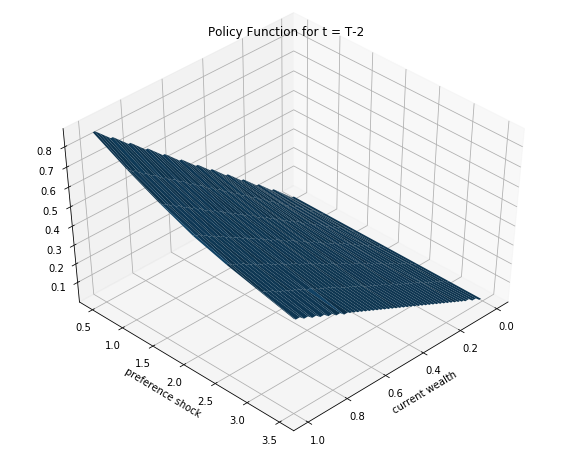

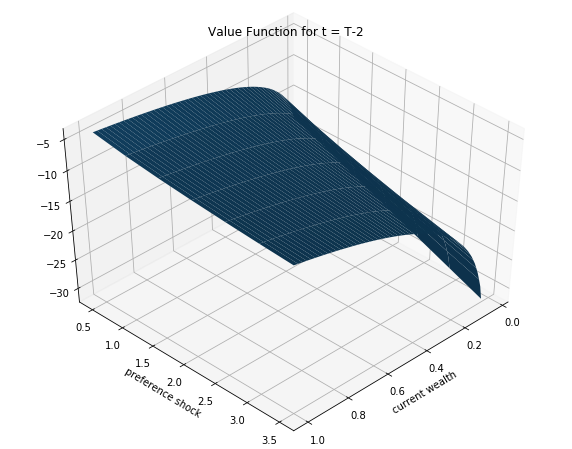

In [686]:
%matplotlib inline
# %matplotlib qt
X, Y = np.meshgrid(W_space, epsilon_space)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, psi_T)
new_ax.set_xlabel('current wealth')
new_ax.set_ylabel('preference shock')
new_ax.set_title("Policy Function for t = T-2") 
new_ax.view_init(elev=45,azim=45)
plt.show()

X, Y = np.meshgrid(W_space[3:], epsilon_space)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, V_T[3:])
new_ax.set_xlabel('current wealth')
new_ax.set_ylabel('preference shock')
new_ax.set_title("Value Function for t = T-2") 
new_ax.view_init(elev=45,azim=45)
plt.show()

In [687]:
distance3 = sigma_T(V_T, V_T_post)

3.7200870380702984e+20

In [688]:
distance3 = sigma_T(V_T, V_T_post)
print('sigma_T-1: ', distance3)
print('sigma_T-1: ', distance2)
print('sigma_T  : ', distance1)
print('sigma_T-2 < sigma_T-1 < sigma_T:', distance3 < distance2 < distance1)

sigma_T-1:  3.7200870380702984e+20
sigma_T-1:  4.592700047000368e+20
sigma_T  :  5.6700000580251445e+20
sigma_T-2 < sigma_T-1 < sigma_T: True


## Exercise 21

In [689]:
distance = 1
iteration = 0
V_T = np.zeros((N, M)) # Initial V_T
obj_func = lambda x: (util_mat + beta * x) # arg x: value function of next period 
psi_list = []

while distance >= 1e-9: 
    iteration += 1
    V_T_post = V_T
    EV_T_post = V_T_post @ epsilon_density
    EV_T_post_mat = np.tile(EV_T_post, (N, M, 1))

    # Replace the value function of any negative consumption with a big negative number. 
    EV_T_post_mat[consumption_mat <= 0] = -1e10

    # Find the optimal choice
    V_T = obj_func(EV_T_post_mat).max(axis=2)
    distance = sigma_T(V_T, V_T_post)
    index_mat = np.argmax(obj_func(EV_T_post_mat), axis=2)
    psi_T = np.zeros((N, M))
    for i in range(N): 
        for j in range(M):
            psi_T[i][j] = W_space[index_mat[i][j]]
    psi_list.append(psi_T)

# Times of iterations until the distance measure is as small as 1e-9

print(f'The distance measure falls below the tolerance on the {iteration}-th iteration. ')

The distance measure falls below the tolerance on the 101-th iteration. 


## Exercise 22

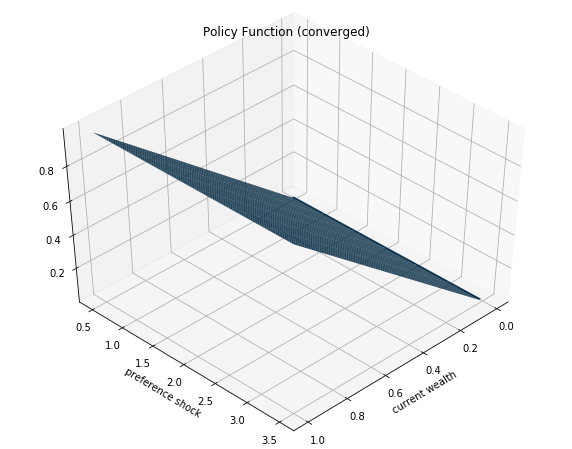

In [691]:
%matplotlib inline
# %matplotlib qt
X, Y = np.meshgrid(W_space, epsilon_space)
new_fig = plt.figure(figsize=(10,8))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, psi_T)
new_ax.set_xlabel('current wealth')
new_ax.set_ylabel('preference shock')
new_ax.set_title("Policy Function (converged)") 
new_ax.view_init(elev=45,azim=45)
plt.show()